In [106]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [109]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000024083F331D0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000024086BB6438>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000024086BB6048>)

In [110]:
mnist.train.images.shape,mnist.train.labels.shape

((55000, 784), (55000, 10))

In [7]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [112]:
mnist.test.images.shape

(10000, 784)

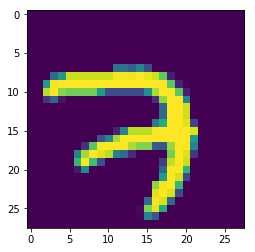

In [113]:
import numpy as np
from matplotlib import pyplot as plt
first_image = mnist.train.images[0]
first_image = np.array(first_image,dtype = 'float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [114]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

bias = {
    'h1':tf.Variable(tf.random_normal([n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [115]:
def forward_propogation(x,weights,bias):
    in_layer_1 = tf.add(tf.matmul(x,weights['h1']),bias['h1'])
    out_layer_1 = tf.nn.relu(in_layer_1)#activation function
    
    in_layer_2 = tf.add(tf.matmul(out_layer_1,weights['h2']),bias['h2'])
    out_layer_2 = tf.nn.relu(in_layer_2)
    
    output = tf.add(tf.matmul(out_layer_2,weights['out']),bias['out'])
    return output

In [116]:
x = tf.placeholder('float',[None,784])
y = tf.placeholder(tf.int32,[None,10])
pred = forward_propogation(x,weights,bias)

In [117]:
#cost function #suppose we haven't created session
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred,labels = y))

In [118]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
optimize = optimizer.minimize(cost)

In [119]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [104]:
c,_ = sess.run([cost,optimize],feed_dict = {x:mnist.train.images,y:mnist.train.labels})
c
#cost is reducing with each iteration

17.802803

In [ ]:
#how does opimizer work??, watch video

In [69]:
for i in range(25):
    c,_ = sess.run([cost,optimize],feed_dict = {x:mnist.train.images,y:mnist.train.labels})
    print(c)

669.8313
555.9489
468.033
355.3168
257.8407
204.42458
185.59958
179.50389
174.74199
163.39636
144.23528
123.665146
109.01171
102.64229
101.64278
100.95207
96.76776
89.2536
80.7525
73.626236
69.01512
66.72401
65.92468
65.31405
63.883453


In [70]:
pred_labels = tf.argmax(pred,1) #return the index with max_value
true_labels = tf.argmax(y,1)
correct_labels = tf.equal(pred_labels,true_labels)
pred_eval,correct_pred = sess.run([pred_labels,correct_labels],feed_dict = {x:mnist.test.images,y:mnist.test.labels})
correct_pred.sum()

8729

In [120]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        c,_ = sess.run([cost,optimize],feed_dict = {x:batch_x,y:batch_y})
        total_cost += c
    print(total_cost) 
    

25721.31473517418
4459.382441987395
2405.555528333783
1646.1053761262685
1270.808236352304
1111.5068167355855
914.6324222748567
973.4604564572186
881.2185585131616
722.3274430890821
710.4415533181497
607.1490868763265
544.6205367295016
384.3752507882489
426.7456428894495
411.38871316590564
334.5430097123252
315.2473296208528
340.7614404094086
259.1926024511439
212.13327082882546
252.9801615418285
145.7280324873451
147.84272018986152
160.76229724253622


In [121]:
pred_labels = tf.argmax(pred,1) #return the index with max_value
true_labels = tf.argmax(y,1)
correct_labels = tf.equal(pred_labels,true_labels)
pred_eval,correct_pred = sess.run([pred_labels,correct_labels],feed_dict = {x:mnist.test.images,y:mnist.test.labels})
correct_pred.sum()
#preety good accuracy

9574